# Conditions when one can assume steady state in the shell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os, traceback, sys, h5py

In [2]:
plt.rcParams.update({'font.size': 20})

%config InlineBackend.figure_format='retina'

### Importing the code + PyPackage locally

In [3]:
sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-pde')
import pde

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-droplets')
import droplets

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-phasesep')
import phasesep

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/agent-based-emulsions')
import agent_based

######################################################################################################################

In [4]:
k = 1e-1

###############

A = 1e-1 * k

# A = 0 * k

###############

D = 1e3 * k

R = 20

L = 200

In [5]:
A, D, k

(0.010000000000000002, 100.0, 0.1)

In [6]:
f'{A} - {k} * c'

'0.010000000000000002 - 0.1 * c'

In [7]:
xeta = np.sqrt(D/k)

xeta

31.622776601683793

In [8]:
timescale_k = (1 / k)

timescale_diffusivity = (L*L / D)

timescale_A = (1 / (A * L * L * L))

timescale_k, timescale_diffusivity, timescale_A

(10.0, 400.0, 1.2499999999999996e-05)

In [9]:
NS_1 = timescale_k / timescale_diffusivity

NS_2 = timescale_A / timescale_k

NS_1, NS_2

(0.025, 1.2499999999999995e-06)

In [10]:
cEqOut = 2 * 0.083/R

cfar = A/k # C_INF

cEqOut, cfar

(0.0083, 0.10000000000000002)

### Outside the droplet

Text(0.5, 1.0, 'Theory')

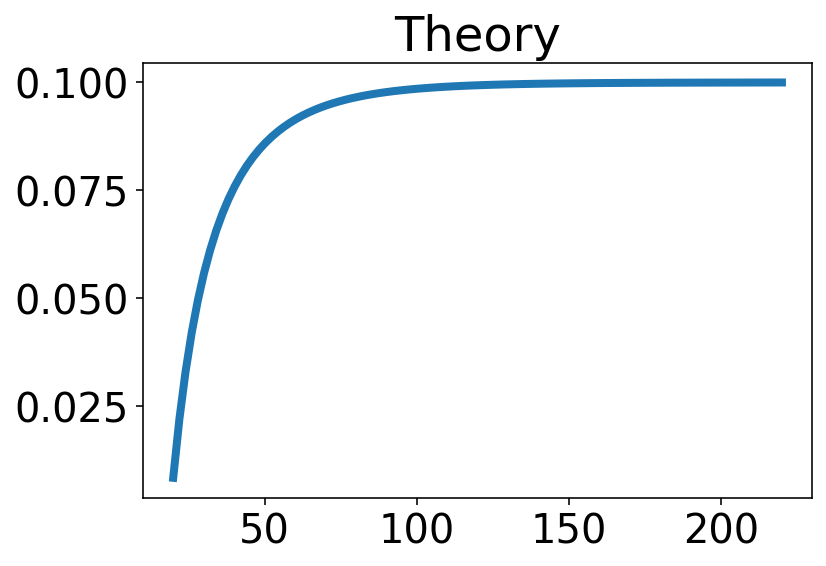

In [11]:
r = np.linspace(R, R + L, 100)

analytical_solution = (np.exp(L/xeta)*(-1 + 1/(np.tanh(L/xeta))) * (A*r*np.sinh(L/xeta) - 
                                    (A - cfar*k)*(L + R)*np.sinh((r - R)/xeta) + 
                                    (-A + cEqOut*k)*R*np.sinh((L - r + R)/xeta)))/(k*r)

plt.plot(r, analytical_solution, linewidth = 4)

plt.title('Theory')

In [12]:
grid = pde.SphericalGrid([R, R + L], 100)

field = pde.ScalarField.random_uniform(grid)

bcs = [{"value": cEqOut}, {"value": cfar}]

eq = phasesep.ReactionDiffusionPDE({'diffusivity': D, 'reaction_flux': f'{A} -({k}) * c', "bc": bcs})

plot_tracker = pde.trackers.PlotTracker(interval = 1)

sol = eq.solve(field, t_range = 1e3, tracker = ['progress', plot_tracker]);

  0%|          | 0/1000.0 [00:00<?, ?it/s]

Output()

Spent more time on handling trackers (395.76848900000005) than on the actual simulation (14.844623999999943)


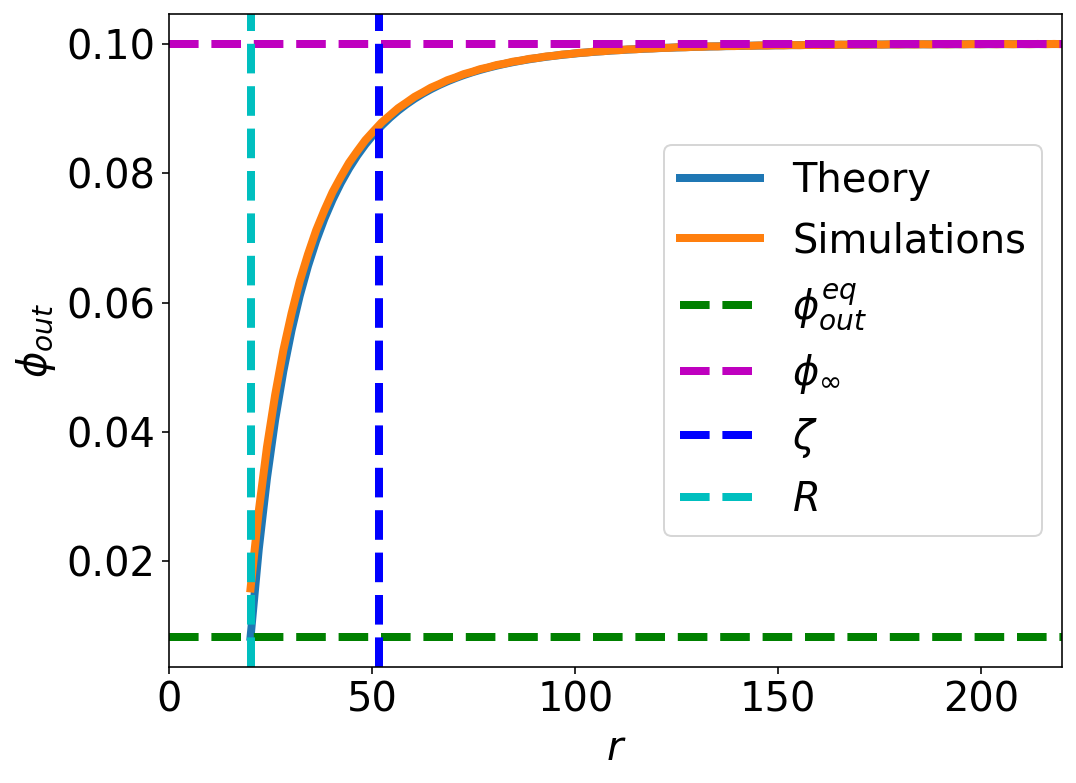

In [13]:
plt.figure(figsize = (8, 6))

plt.plot(r, analytical_solution, linewidth = 4, label = 'Theory')

plt.plot(r, sol.data, linewidth = 4, label = 'Simulations')

plt.axhline(y = cEqOut, color = 'g', linestyle = '--', linewidth = 4, label = r'$\phi^{eq}_{out}$')

plt.axhline(y = cfar, color = 'm', linestyle = '--', linewidth = 4, label = r'$\phi_{\infty}$')

plt.axvline(x = R + xeta, color = 'b', linestyle = '--', linewidth = 4, label = r'$\zeta$')

plt.axvline(x = R, color = 'c', linestyle = '--', linewidth = 4, label = r'$R$')

plt.xlabel(r'$r$')

plt.ylabel(r'$\phi_{out}$')

plt.xlim(0, R + L)

plt.legend()